# How to Develop an Auxiliary Classifier GAN (AC-GAN) From Scratch with Keras

[Source](https://machinelearningmastery.com/how-to-develop-an-auxiliary-classifier-gan-ac-gan-from-scratch-with-keras/)

Generative Adversarial Networks, or GANs, are an architecture for training generative models, such as deep convolutional neural networks for generating images.

The conditional generative adversarial network, or cGAN for short, is a type of GAN that involves the conditional generation of images by a generator model. Image generation can be conditional on a class label, if available, allowing the targeted generated of images of a given type.

The Auxiliary Classifier GAN, or AC-GAN for short, is an extension of the conditional GAN that changes the __discriminator to predict the class label of a given image rather than receive it as input__. 

It has the effect of:
1- stabilizing the training process and 
2- allowing the generation of large high-quality images whilst learning a representation in the latent space that is independent of the class label.

In this tutorial, you will discover how to develop an auxiliary classifier generative adversarial network for generating photographs of clothing.

After completing this tutorial, you will know:

- The auxiliary classifier GAN is a type of conditional GAN that requires that the discriminator predict the class label of a given image.
- How to develop generator, discriminator, and composite models for the AC-GAN.
- How to train, evaluate, and use an AC-GAN to generate photographs of clothing from the Fashion-MNIST dataset.

# Tutorial Overview
This tutorial is divided into five parts; they are:

- Auxiliary Classifier Generative Adversarial Networks
- Fashion-MNIST Clothing Photograph Dataset
- How to Define AC-GAN Models
- How to Develop an AC-GAN for Fashion-MNIST
- How to Generate Items of Clothing With the AC-GAN

# Auxiliary Classifier Generative Adversarial Networks
The generative adversarial network is an architecture for training a generative model, typically deep convolutional neural networks for generating image.

The architecture is comprised of both a generator model that takes random points from a latent space as input and generates images, and a discriminator for classifying images as either real (from the dataset) or fake (generate). Both models are then trained simultaneously in a zero-sum game.


__Relation to cGAN__

A conditional GAN, cGAN or CGAN for short, is an extension of the GAN architecture that adds structure to the latent space. 

The training of the GAN model is changed so that the __generator__ is provided both with a ___point in the latent space and a class label as input___, and attempts to generate an image for that class. The __discriminator__ is provided with both an ___image and the class label and must classify whether the image is real or fake as before___.

The addition of the class as input makes the image generation process, and image classification process, conditional on the class label, hence the name. The effect is both a more stable training process and a resulting generator model that can be used to generate images of a given specific type, e.g. for a class label.

__ACGAN__

_Same objective as cGAN but with different technique_

The Auxiliary Classifier GAN, or AC-GAN for short, is a further extension of the GAN architecture building upon the CGAN extension. It was introduced by Augustus Odena, et al. from Google Brain in the 2016 paper titled _“Conditional Image Synthesis with Auxiliary Classifier GANs.”_

As with the conditional GAN, the __generator__ model in the AC-GAN is provided both with a __point in the latent space__ and the __class label as input__, e.g. the image generation process is conditional.

The main difference is in the __discriminator__ model, which is __only provided with the image as input__, unlike the conditional GAN that is provided with the image and class label as input. The discriminator model must __then predict whether the given image is real or fake__ as before, __and must also predict the class label of the image__.

_… the model […] is class conditional, but with an auxiliary decoder that is tasked with reconstructing class labels._

— Conditional Image Synthesis With Auxiliary Classifier GANs, 2016.

The architecture is described in such a way that the discriminator and auxiliary classifier may be considered separate models that share model weights. _In practice, the discriminator and auxiliary classifier can be implemented as a single neural network model with two outputs._
__
The __first output__ is a single probability via the __sigmoid__ activation function that indicates the __“realness”__ of the input image and is optimized using binary cross entropy like a normal GAN discriminator model.

The __second output__ is a probability of the image belonging to each class via the __softmax__ activation function, like any given __multi-class classification__ neural network model, and is optimized using __categorical cross entropy__.

## To summarize:

__Generator Model:__

_Input:_ Random point from the latent space, and the class label.

_Output:_ Generated image.

__Discriminator Model:__

_Input:_ Image.

_Output:_ Probability that the provided image is real + probability of the image belonging to each known class.

The plot below summarizes the inputs and outputs of a range of conditional GANs, including the AC-GAN, providing some context for the differences.

![types_GANs](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/05/Summary-of-the-Differences-Between-the-Conditional-GAN-Semi-Supervised-GAN-InfoGAN-and-AC-GAN-1024x423.png)

__Objectives__

The __discriminator__ seeks to __maximize the probability of correctly classifying real and fake images (LS) and correctly predicting the class label (LC) of a real or fake image (e.g. LS + LC)__. 

The __generator__ seeks to __minimize the ability of the discriminator to discriminate real and fake images__ whilst __also maximizing the ability of the discriminator predicting the class label of real and fake images (e.g. LC – LS).__

The __objective function__ has __two parts__: 

1- the log-likelihood of the correct source, __LS__, and

2- the log-likelihood of the correct class, __LC__. 

_[…] D is trained to maximize LS + LC while G is trained to maximize LC − LS._

— Conditional Image Synthesis With Auxiliary Classifier GANs, 2016.


___The resulting generator learns a latent space representation that is independent of the class label, unlike the conditional GAN.___

_AC-GANs learn a representation for z that is independent of class label.)

— Conditional Image Synthesis With Auxiliary Classifier GANs, 2016.

The effect of changing the conditional GAN in this way is both:

1- a more stable training process and 

2- the ability of the model to generate higher quality images with a larger size than had been previously possible, e.g. 128×128 pixels.

_… we demonstrate that adding more structure to the GAN latent space along with a specialized cost function results in higher quality samples. […] Importantly, we demonstrate quantitatively that our high resolution samples are not just naive resizings of low resolution samples._

— Conditional Image Synthesis With Auxiliary Classifier GANs, 2016.



# Fashion-MNIST Clothing Photograph Dataset

The Fashion-MNIST dataset is proposed as a more challenging replacement dataset for the MNIST handwritten digit dataset.

It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more.

Keras provides access to the Fashion-MNIST dataset via the fashion_mnist.load_dataset() function. It returns two tuples, one with the input and output elements for the standard training dataset, and another with the input and output elements for the standard test dataset.

The example below loads the dataset and summarizes the shape of the loaded dataset.

Note: the first time you load the dataset, Keras will automatically download a compressed version of the images and save them under your home directory in ~/.keras/datasets/. The download is fast as the dataset is only about 25 megabytes in its compressed form.

In [0]:
# example of loading the fashion_mnist dataset
from keras.datasets.fashion_mnist import load_data
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


The images are grayscale with a black background (0 pixel value) and the items of clothing in white ( pixel values near 255). This means if the images were plotted, they would be mostly black with a white item of clothing in the middle.

We can plot some of the images from the training dataset using the matplotlib library with the imshow() function and specify the color map via the ‘cmap‘ argument as ‘gray‘ to show the pixel values correctly.

Alternately, the images are easier to review when we reverse the colors and plot the background as white and the clothing in black.

They are easier to view as most of the image is now white with the area of interest in black. This can be achieved using a reverse grayscale color map, as follows:

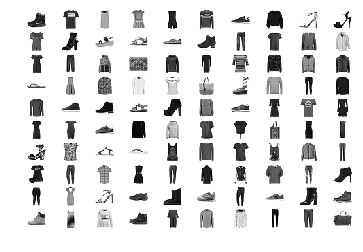

In [0]:
# example of loading the fashion_mnist dataset
from keras.datasets.fashion_mnist import load_data
from matplotlib import pyplot
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# plot images from the training dataset
for i in range(100):
	# define subplot
	pyplot.subplot(10, 10, 1 + i)
	# turn off axis
	pyplot.axis('off')
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap='gray_r')
pyplot.show()

We will use the images in the training dataset as the basis for training a Generative Adversarial Network.

Specifically, the generator model will learn how to generate new plausible items of clothing, using a discriminator that will try to distinguish between real images from the Fashion MNIST training dataset and new images output by the generator model, and predict the class label for each.

This is a relatively simple problem that does not require a sophisticated generator or discriminator model, although it does require the generation of a grayscale output image.

# How to Define AC-GAN Models
In this section, we will develop the generator, discriminator, and composite models for the AC-GAN.

The appendix of the AC-GAN paper provides suggestions for generator and discriminator configurations that we will use as inspiration. The table below summarizes these suggestions for the CIFAR-10 dataset, taken from the paper.

# D
Let’s start with the discriminator model.

The discriminator model must take as input an image and predict both the probability of the ‘realness‘ of the image and the probability of the image belonging to each of the given classes.

The input images will have the shape 28x28x1 and there are 10 classes for the items of clothing in the Fashion MNIST dataset.

The model can be defined as per the DCGAN architecture. That is, using Gaussian weight initialization, batch normalization, LeakyReLU, Dropout, and a 2×2 stride for downsampling instead of pooling layers.

For example, below is the bulk of the discriminator model defined using the Keras functional API.

__Multi-outputs__

The main difference is that the model has two output layers.

The first is a single node with the sigmoid activation for predicting the real-ness of the image.

The second is multiple nodes, one for each class, using the softmax activation function to predict the class label of the given image.

We can then construct the image with a single input and two outputs.

__Multi-loss functions__

The model must be trained with two loss functions, binary cross entropy for the first output layer, and categorical cross-entropy loss for the second output layer.

Rather than comparing a one hot encoding of the class labels to the second output layer, as we might do normally, we can compare the integer class labels directly. We can achieve this automatically using the sparse categorical cross-entropy loss function. This will have the identical effect of the categorical cross-entropy but avoids the step of having to manually one hot encode the target labels.

When compiling the model, we can inform Keras to use the two different loss functions for the two output layers by specifying a list of function names as strings.

The model is fit using the Adam version of stochastic gradient descent with a small learning rate and modest momentum, as is recommended for DCGANs.

Tying this together, the `define_discriminator()` function will define and compile the discriminator model for the AC-GAN.

The shape of the input images and the number of classes are parameterized and set with defaults, allowing them to be easily changed for your own project in the future.

In [0]:
# example of defining the discriminator model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.initializers import RandomNormal
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1), n_classes=10):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=in_shape)
	# downsample to 14x14
	fe = Conv2D(32, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
	fe = LeakyReLU(alpha=0.2)(fe)
	fe = Dropout(0.5)(fe)
	# normal
	fe = Conv2D(64, (3,3), padding='same', kernel_initializer=init)(fe)
	fe = BatchNormalization()(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	fe = Dropout(0.5)(fe)
	# downsample to 7x7
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(fe)
	fe = BatchNormalization()(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	fe = Dropout(0.5)(fe)
	# normal
	fe = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(fe)
	fe = BatchNormalization()(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	fe = Dropout(0.5)(fe)
	# flatten feature maps
	fe = Flatten()(fe)
	# real/fake output
	out1 = Dense(1, activation='sigmoid')(fe)
	# class label output
	out2 = Dense(n_classes, activation='softmax')(fe)
	# define model
	model = Model(in_image, [out1, out2])
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'sparse_categorical_crossentropy'], optimizer=opt)
	return model

# define the discriminator model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

W0828 11:30:49.714547 140375847982976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 11:30:49.768571 140375847982976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 11:30:49.776660 140375847982976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0828 11:30:49.809067 140375847982976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0828 11:30:49.819362 14

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 14, 14, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 14, 14, 32)   0           leaky_re_lu_1[0][0]              
__________________________________________________________________________________________________
conv2d_2 (

Now that we have defined our AC-GAN discriminator model, we can develop the generator model.

# G
The generator model must take a random point from the latent space as input, and the class label, then output a generated grayscale image with the shape 28x28x1.
__Feeding the label as Embedding__

The AC-GAN paper describes the AC-GAN generator model taking a vector input that is a concatenation of the point in latent space (100 dimensions) and the one hot encoded class label (10 dimensions) that is 110 dimensions.

An alternative approach that has proven effective and is now generally recommended is to interpret the class label as an additional channel or feature map early in the generator model.

This can be achieved by using a learned embedding with an arbitrary number of dimensions (e.g. 50), the output of which can be interpreted by a fully connected layer with a linear activation resulting in one additional 7×7 feature map.

The point in latent space can be interpreted by a fully connected layer with sufficient activations to create multiple 7×7 feature maps, in this case, 384, and provide the basis for a low-resolution version of our output image.

The 7×7 single feature map interpretation of the class label can then be channel-wise concatenated, resulting in 385 feature maps.

These feature maps can then go through the process of two transpose convolutional layers to upsample the 7×7 feature maps first to 14×14 pixels, and then finally to 28×28 features, quadrupling the area of the feature maps with each upscaling step.

The output of the generator is a single feature map or grayscale image with the shape 28×28 and pixel values in the range [-1, 1] given the choice of a tanh activation function. We use ReLU activation for the upscaling layers instead of LeakyReLU given the suggestion the AC-GAN paper.

We can tie all of this together and into the `define_generator()` function defined below that will create and return the generator model for the AC-GAN.

The model is intentionally __not compiled__ as it is not trained directly; instead, it is trained via the discriminator model.

In [0]:
# example of defining the generator model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
from keras.layers import Embedding
from keras.layers import Concatenate
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.initializers import RandomNormal
from keras.utils.vis_utils import plot_model

# define the standalone generator model
def define_generator(latent_dim, n_classes=10):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# linear multiplication
	n_nodes = 7 * 7
	li = Dense(n_nodes, kernel_initializer=init)(li)
	# reshape to additional channel
	li = Reshape((7, 7, 1))(li)
	# image generator input
	in_lat = Input(shape=(latent_dim,))
	# foundation for 7x7 image
	n_nodes = 384 * 7 * 7
	gen = Dense(n_nodes, kernel_initializer=init)(in_lat)
	gen = Activation('relu')(gen)
	gen = Reshape((7, 7, 384))(gen)
	# merge image gen and label input
	merge = Concatenate()([gen, li])
	# upsample to 14x14
	gen = Conv2DTranspose(192, (5,5), strides=(2,2), padding='same', kernel_initializer=init)(merge)
	gen = BatchNormalization()(gen)
	gen = Activation('relu')(gen)
	# upsample to 28x28
	gen = Conv2DTranspose(1, (5,5), strides=(2,2), padding='same', kernel_initializer=init)(gen)
	out_layer = Activation('tanh')(gen)
	# define model
	model = Model([in_lat, in_label], out_layer)
	return model

# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 18816)        1900416     input_3[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 50)        500         input_2[0][0]                    
__________________________________________________________________________________________________
activation

Running the example first prints a summary of the layers and their output shape in the model.

We can confirm that the latent dimension input is 100 dimensions and that the class label input is a single integer. We can also confirm that the output of the embedding class label is _correctly concatenated as an additional channel_ resulting in 385 7×7 feature maps prior to the transpose convolutional layers.

Now that we have defined the generator model, we can show how it might be fit.

# GAN (AC-GAN)
_The generator model is not updated directly; instead, it is updated via the discriminator model._

This can be achieved by creating a composite model that stacks the generator model on top of the discriminator model.

The input to this composite model is the input to the generator model, namely a random point from the latent space and a class label. The generator model is connected directly to the discriminator model, which takes the generated image directly as input. Finally, the discriminator model predicts both the realness of the generated image and the class label. As such, the composite model is optimized using two loss functions, one for each output of the discriminator model.

The __discriminator__ model is __updated in a standalone manner__ using real and fake examples, and we will review how to do this in the next section. Therefore, __we do not want to update the discriminator model when updating (training) the composite model__; we only want to use this composite model to update the weights of the generator model.

This can be achieved by setting the layers of the __discriminator as not trainable__ prior to compiling the composite model. This only has an effect on the layer weights when viewed or used by the composite model and prevents them from being updated when the composite model is updated.

The `define_gan()` function below implements this, taking the already defined generator and discriminator models as input and defining a new composite model that can be used to update the generator model only.

In [0]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect the outputs of the generator to the inputs of the discriminator
	gan_output = d_model(g_model.output)
	# define gan model as taking noise and label and outputting real/fake and label outputs
	model = Model(g_model.input, gan_output)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'sparse_categorical_crossentropy'], optimizer=opt)
	return model

Now that we have defined the models used in the AC-GAN, we can fit them on the Fashion-MNIST dataset.

# How to Develop an AC-GAN for Fashion-MNIST
## Data preparation
The first step is to load and prepare the Fashion MNIST dataset.

We only require the images in the training dataset. The images are black and white, therefore we must add an additional channel dimension to transform them to be three dimensional, as expected by the convolutional layers of our models. 

__Finally, the pixel values must be scaled to the range [-1,1] to match the output of the generator model (tanh)__

The `load_real_samples()` function below implements this, returning the loaded and scaled Fashion MNIST training dataset ready for modeling.

In [0]:
# load images
def load_real_samples():
	# load dataset
	(trainX, trainy), (_, _) = load_data()
	# expand to 3d, e.g. add channels
	X = expand_dims(trainX, axis=-1)
	# convert from ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	print(X.shape, trainy.shape)
	return [X, trainy]

We will require one batch (or a half batch) of real images from the dataset each update to the GAN model. A simple way to achieve this is to select a random sample of images from the dataset each time.

The `generate_real_samples()` function below implements this, taking the prepared dataset as an argument, selecting and returning a random sample of Fashion MNIST images and clothing class labels.

The “dataset” argument provided to the function is a list comprised of the images and class labels as returned from the `load_real_samples()` function. The function also returns their corresponding class label for the discriminator, specifically class=1 indicating that they are real images.

In [0]:
# select real samples
def generate_real_samples(dataset, n_samples):
	# split into images and labels
	images, labels = dataset
	# choose random instances
	ix = randint(0, images.shape[0], n_samples)
	# select images and labels
	X, labels = images[ix], labels[ix]
	# generate class labels
	y = ones((n_samples, 1))
	return [X, labels], y

Next, we need inputs for the generator model.

These are random points from the latent space, specifically Gaussian distributed random variables.

The `generate_latent_points()` function implements this, taking the size of the latent space as an argument and the number of points required, and returning them as a batch of input samples for the generator model. The function also returns randomly selected integers in [0,9] inclusively for the 10 class labels in the Fashion-MNIST dataset.

In [0]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]

Next, we need to use the points in the latent space and clothing class labels as input to the generator in order to generate new images.

The `generate_fake_samples()` function below implements this, taking the generator model and size of the latent space as arguments, then generating points in the latent space and using them as input to the generator model.

The function returns the generated images, their corresponding clothing class label, and their discriminator class label, specifically class=0 to indicate they are fake or generated.

In [0]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input, labels_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict([z_input, labels_input])
	# create class labels
	y = zeros((n_samples, 1))
	return [images, labels_input], y

There are no reliable ways to determine when to stop training a GAN; instead, images can be subjectively inspected in order to choose a final model.

Therefore, we can periodically generate a sample of images using the generator model and save the generator model to file for later use. The `summarize_performance()` function below implements this, generating 100 images, plotting them, and saving the plot and the generator to file with a filename that includes the training “step” number.

In [0]:
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, latent_dim, n_samples=100):
	# prepare fake examples
	[X, _], _ = generate_fake_samples(g_model, latent_dim, n_samples)
	# scale from [-1,1] to [0,1]
	X = (X + 1) / 2.0
	# plot images
	for i in range(100):
		# define subplot
		pyplot.subplot(10, 10, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
	# save plot to file
	filename1 = 'generated_plot_%04d.png' % (step+1)
	pyplot.savefig(filename1)
	pyplot.close()
	# save the generator model
	filename2 = 'model_%04d.h5' % (step+1)
	g_model.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

We are now ready to fit the GAN models.

# Train

The model is fit for 100 training epochs, which is arbitrary, as the model begins generating plausible items of clothing after perhaps 20 epochs. A batch size of 64 samples is used, and each training epoch involves 60,000/64, or about 937, batches of real and fake samples and updates to the model. The summarize_performance() function is called every 10 epochs, or every (937 * 10) 9,370 training steps.

For a given training step, first the discriminator model is updated for a half batch of real samples, then a half batch of fake samples, together forming one batch of weight updates. The generator is then updated via the combined GAN model. Importantly, the class label is set to 1, or real, for the fake samples. This has the effect of updating the generator toward getting better at generating real samples on the next batch.

__Losses__

Note, the discriminator and composite model return three loss values from the call to the `train_on_batch()` function. The first value is the sum of the loss values and can be ignored, whereas the second value is the loss for the real/fake output layer and the third value is the loss for the clothing label classification.

The train() function below implements this, taking the defined models, dataset, and size of the latent dimension as arguments and parameterizing the number of epochs and batch size with default arguments. The generator model is saved at the end of training.

__Inverted labels for composite model__

As the usual trick, during training the composite model and when feeding fake samples from the G to the D, we mark it as real "1" to try to trick the discriminator and making the G better.

In [0]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=1, n_batch=64):
	# calculate the number of batches per training epoch
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# calculate the size of half a batch of samples
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_steps):
		# get randomly selected 'real' samples
		[X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
		# update discriminator model weights
		_,d_r1,d_r2 = d_model.train_on_batch(X_real, [y_real, labels_real])
		# generate 'fake' examples
		[X_fake, labels_fake], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator model weights
		_,d_f,d_f2 = d_model.train_on_batch(X_fake, [y_fake, labels_fake])
		# prepare points in latent space as input for the generator
		[z_input, z_labels] = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		_,g_1,g_2 = gan_model.train_on_batch([z_input, z_labels], [y_gan, z_labels])
		# summarize loss on this batch
		print('>%d, dr[%.3f,%.3f], df[%.3f,%.3f], g[%.3f,%.3f]' % (i+1, d_r1,d_r2, d_f,d_f2, g_1,g_2))
		# evaluate the model performance every 'epoch'
		if (i+1) % (bat_per_epo * 1) == 0:
			summarize_performance(i, g_model, latent_dim)

We can then define the size of the latent space, define all three models, and train them on the loaded fashion MNIST dataset.

In [0]:
# example of fitting an auxiliary classifier gan (ac-gan) on fashion mnsit
from numpy import zeros
from numpy import ones
from numpy import expand_dims
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Activation
from keras.layers import Concatenate
from keras.initializers import RandomNormal
from matplotlib import pyplot


# size of the latent space
latent_dim = 100
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# load image data
dataset = load_real_samples()
# train model
train(generator, discriminator, gan_model, dataset, latent_dim)

(60000, 28, 28, 1) (60000,)


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, dr[0.524,3.088], df[2.034,3.269], g[0.476,3.200]
>2, dr[0.401,2.837], df[1.343,2.934], g[0.666,3.357]


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>3, dr[0.602,3.313], df[1.062,3.134], g[0.987,3.127]
>4, dr[0.881,2.854], df[0.963,3.341], g[1.163,3.041]
>5, dr[0.682,2.529], df[0.750,2.876], g[1.047,3.166]
>6, dr[0.609,2.440], df[0.584,3.081], g[1.011,3.027]
>7, dr[0.593,2.821], df[0.910,3.383], g[1.315,3.067]
>8, dr[0.604,2.944], df[0.527,3.105], g[1.231,3.147]
>9, dr[0.462,2.491], df[0.746,3.152], g[1.481,3.353]
>10, dr[0.498,2.502], df[0.894,3.443], g[1.604,3.306]
>11, dr[0.574,2.227], df[0.660,2.837], g[1.822,3.323]
>12, dr[0.842,2.345], df[0.542,3.751], g[1.557,3.112]
>13, dr[0.642,2.322], df[0.588,3.095], g[1.697,3.150]
>14, dr[0.660,2.393], df[0.498,3.171], g[1.347,3.401]
>15, dr[0.617,2.461], df[0.653,3.375], g[1.507,2.690]
>16, dr[0.548,2.474], df[0.323,2.758], g[1.417,2.995]
>17, dr[0.512,2.359], df[0.792,3.427], g[1.263,3.188]
>18, dr[0.349,2.346], df[0.496,3.136], g[1.420,3.245]
>19, dr[0.469,1.893], df[0.423,2.899], g[0.988,3.202]
>20, dr[0.564,1.843], df[0.554,2.868], g[0.815,3.452]
>21, dr[0.591,2.139], df[0.850,3.07

The loss is reported each training iteration, including the real/fake and class loss for the discriminator on real examples (dr), the discriminator on fake examples (df), and the generator updated via the composite model when generating images (g).

# How to Generate Items of Clothing With the AC-GAN
In this section, we can load a saved model and use it to generate new items of clothing that plausibly could have come from the Fashion-MNIST dataset.

The AC-GAN technically does not conditionally generate images based on the class label, at least not in the same way as the conditional GAN.

_AC-GANs learn a representation for z that is independent of class label._

— Conditional Image Synthesis With Auxiliary Classifier GANs, 2016.

___Nevertheless, if used in this way, the generated images mostly match the class label.___

The example below loads the model from the end of the run (any saved model would do), and generates 100 examples of class 7 (sneaker).

___We redefine generate_latent_points___ to force to have all the class labels (not randint as before)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


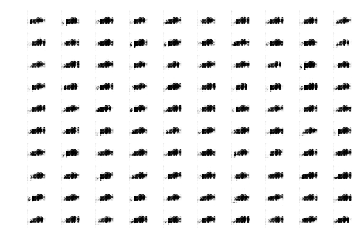

In [0]:
# example of loading the generator model and generating images
from math import sqrt
from numpy import asarray
from numpy.random import randn
from keras.models import load_model
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_class_latent_points(latent_dim, n_samples, n_class):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = asarray([n_class for _ in range(n_samples)])
	return [z_input, labels]

# create and save a plot of generated images
def save_plot(examples, n_examples):
	# plot images
	for i in range(n_examples):
		# define subplot
		pyplot.subplot(sqrt(n_examples), sqrt(n_examples), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	pyplot.show()

# load model
model = load_model('model_0937.h5')
latent_dim = 100
n_examples = 100 # must be a square
n_class = 7 # sneaker
# generate images
latent_points, labels = generate_class_latent_points(latent_dim, n_examples, n_class)
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, n_examples)

# Summary
In this tutorial, you discovered how to develop an auxiliary classifier generative adversarial network for generating photographs of clothing.

Specifically, you learned:

- The auxiliary classifier GAN is a type of conditional GAN that requires that the discriminator predict the class label of a given image.
- How to develop generator, discriminator, and composite models for the AC-GAN.
- How to train, evaluate, and use an AC-GAN to generate photographs of clothing from the Fashion-MNIST dataset.
